## Import libraries

In [85]:
import numpy as np
import re
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import cv2

In [20]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

## Loading the data

In [21]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip

zsh:1: command not found: wget
unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [29]:
def extractImages(datadir):
    imagesData = []
    imagesLabel = []

    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)

        # ✅ Skip non-directory files like .DS_Store
        if not os.path.isdir(path):
            continue  

        for image in os.listdir(path):
            img_path = os.path.join(path, image)

            # ✅ Check if it's an actual file before reading
            if not os.path.isfile(img_path):
                continue

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Warning: Could not read {img_path}")
                continue  # Skip unreadable images

            img = cv2.resize(img, (32, 32))  # Resize images to 32x32
            imagesData.append(img)
            imagesLabel.append(folder)  # Using folder name as label

    return np.array(imagesData), np.array(imagesLabel)

# ✅ Now call extractImages properly
data_dir = './content/data/dataset'
imagesData, imagesLabel = extractImages(data_dir)

# ✅ Print results
print("Number of images: ", len(imagesData))
print("Labels:", list(set(imagesLabel)))

Number of images:  7600
Labels: [np.str_('div'), np.str_('9'), np.str_('7'), np.str_('5'), np.str_('8'), np.str_('mul'), np.str_('add'), np.str_('4'), np.str_('sub'), np.str_('0'), np.str_('3'), np.str_('6'), np.str_('1'), np.str_('2')]


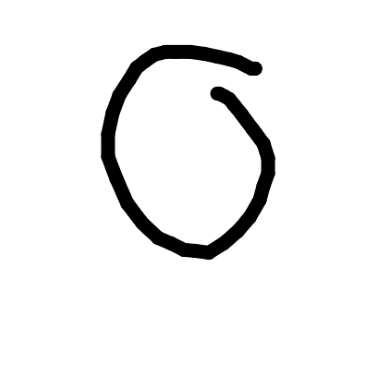

In [30]:
file_path = "./content/data/dataset/0/0CdBlhLw.png"  # Update with actual file name
img = cv2.imread(file_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.show()
else:
    print("Error: Image not loaded. Check file path.")

In [31]:
df=pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [32]:
imagesData = []
imagesLabel = []
data_dir = './content/data/dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))

Number of images:  7600
Labels: [np.str_('div'), np.str_('9'), np.str_('7'), np.str_('5'), np.str_('8'), np.str_('mul'), np.str_('add'), np.str_('4'), np.str_('sub'), np.str_('0'), np.str_('3'), np.str_('6'), np.str_('1'), np.str_('2')]


In [34]:
import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div']
image_count={}
for i in folders:
  folder_path = './content/data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')


Number of images in the folder "./content/data/dataset/0": 595
Number of images in the folder "./content/data/dataset/1": 562
Number of images in the folder "./content/data/dataset/2": 433
Number of images in the folder "./content/data/dataset/3": 541
Number of images in the folder "./content/data/dataset/4": 526
Number of images in the folder "./content/data/dataset/5": 433
Number of images in the folder "./content/data/dataset/6": 581
Number of images in the folder "./content/data/dataset/7": 533
Number of images in the folder "./content/data/dataset/8": 554
Number of images in the folder "./content/data/dataset/9": 546
Number of images in the folder "./content/data/dataset/add": 596
Number of images in the folder "./content/data/dataset/sub": 655
Number of images in the folder "./content/data/dataset/mul": 577
Number of images in the folder "./content/data/dataset/div": 468


In [35]:
print(sum(list(image_count.values())))

7600


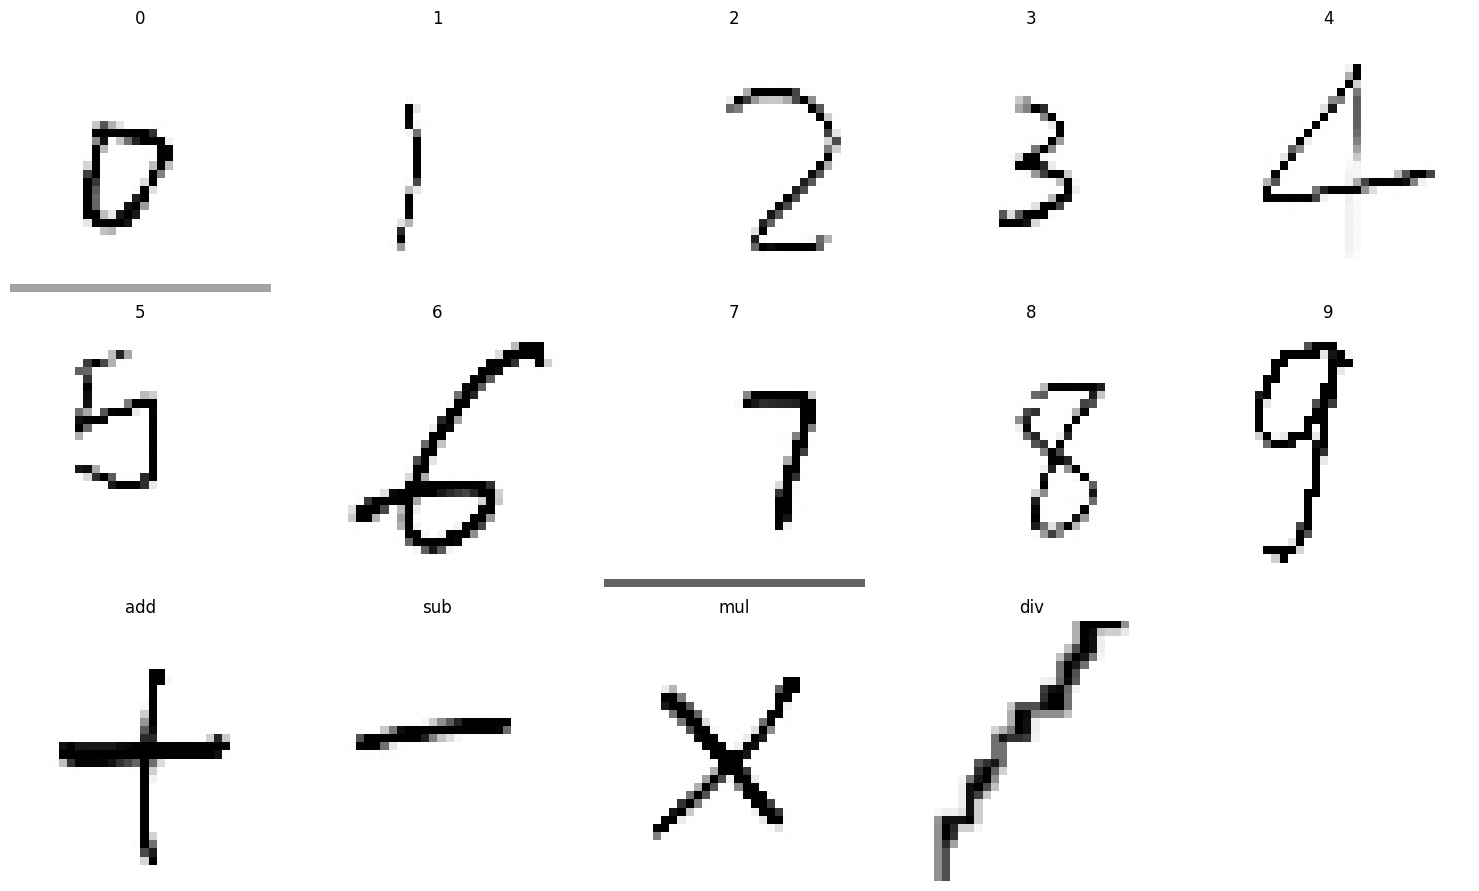

In [36]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = './content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

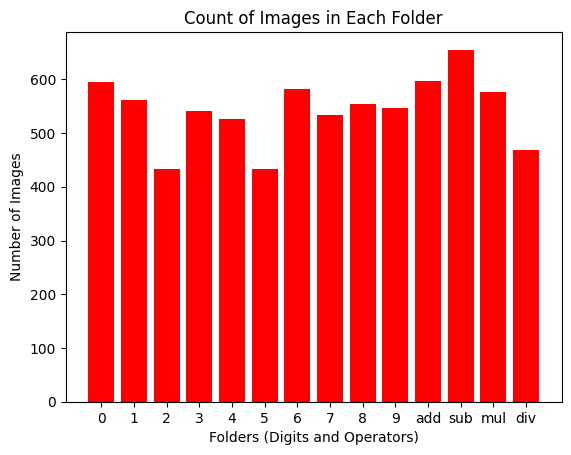

In [39]:
plt.bar(image_count.keys(), image_count.values(), color='red')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

7600


 90


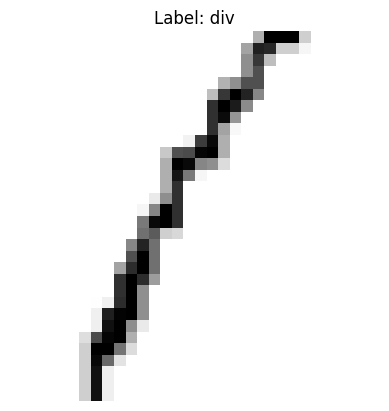

In [42]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [43]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [44]:
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: np.str_('0'), 1: np.str_('1'), 2: np.str_('2'), 3: np.str_('3'), 4: np.str_('4'), 5: np.str_('5'), 6: np.str_('6'), 7: np.str_('7'), 8: np.str_('8'), 9: np.str_('9'), 10: np.str_('add'), 11: np.str_('div'), 12: np.str_('mul'), 13: np.str_('sub')}


In [45]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [46]:
X.shape

(7600, 32, 32)

In [47]:
X = np.expand_dims(X, axis=-1)
X.shape

(7600, 32, 32, 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 6080
Testing set size: 1520


In [49]:
len(np.unique(y))

14

## CNN Model

In [87]:
cnn_model=Sequential()
cnn_model.add(Conv2D(64,(3,3),input_shape=(32,32,1),activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(14, activation='softmax'))

cnn_model.summary()


/Users/apurbakoirala/anaconda3/envs/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,198 (426.55 KB)

 Trainable params: 109,198 (426.55 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.1865 - loss: 2.3851 - val_acc: 0.7171 - val_loss: 0.9757
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.6774 - loss: 0.9992 - val_acc: 0.8487 - val_loss: 0.5290
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.7873 - loss: 0.6851 - val_acc: 0.8921 - val_loss: 0.3572
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8380 - loss: 0.4990 - val_acc: 0.9007 - val_loss: 0.3298
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8665 - loss: 0.4103 - val_acc: 0.9191 - val_loss: 0.2654
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8722 - loss: 0.3914 - val_acc: 0.9309 - val_loss: 0.2327
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8927 - loss: 0.3341 - val_acc: 0.9362 - val_loss: 0.2292
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9003 - loss: 0.3021 - val_acc: 0.9428 - val_loss: 0.2257
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/s

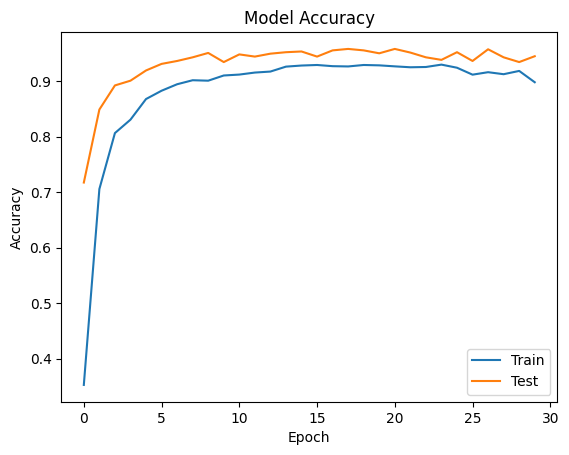

In [89]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [90]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9350 - loss: 0.7629
Test accuracy of the loaded model: 94.47%


In [91]:
loss, accuracy = cnn_model.evaluate(X,y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9711 - loss: 0.2432
Accuracy of the model: 96.70%


In [92]:
print(y.shape)

(7600,)


In [93]:
predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


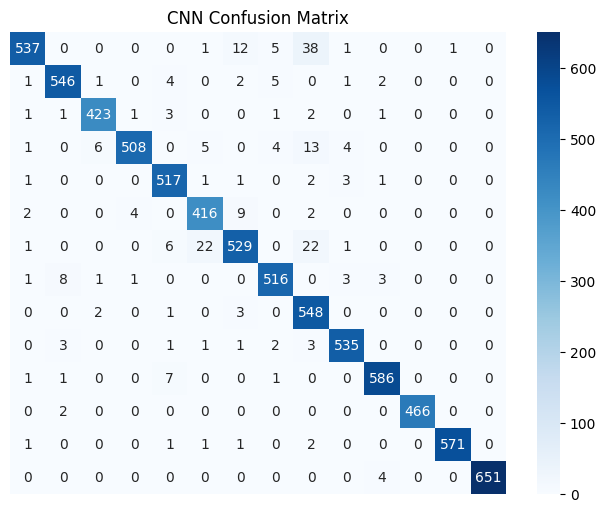

In [94]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()


In [95]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[537   0   0   0   0   1  12   5  38   1   0   0   1   0]
 [  1 546   1   0   4   0   2   5   0   1   2   0   0   0]
 [  1   1 423   1   3   0   0   1   2   0   1   0   0   0]
 [  1   0   6 508   0   5   0   4  13   4   0   0   0   0]
 [  1   0   0   0 517   1   1   0   2   3   1   0   0   0]
 [  2   0   0   4   0 416   9   0   2   0   0   0   0   0]
 [  1   0   0   0   6  22 529   0  22   1   0   0   0   0]
 [  1   8   1   1   0   0   0 516   0   3   3   0   0   0]
 [  0   0   2   0   1   0   3   0 548   0   0   0   0   0]
 [  0   3   0   0   1   1   1   2   3 535   0   0   0   0]
 [  1   1   0   0   7   0   0   1   0   0 586   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0 466   0   0]
 [  1   0   0   0   1   1   1   0   2   0   0   0 571   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0 651]]


In [96]:
cnn_model.save('cnn_model.h5')

In [97]:
from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


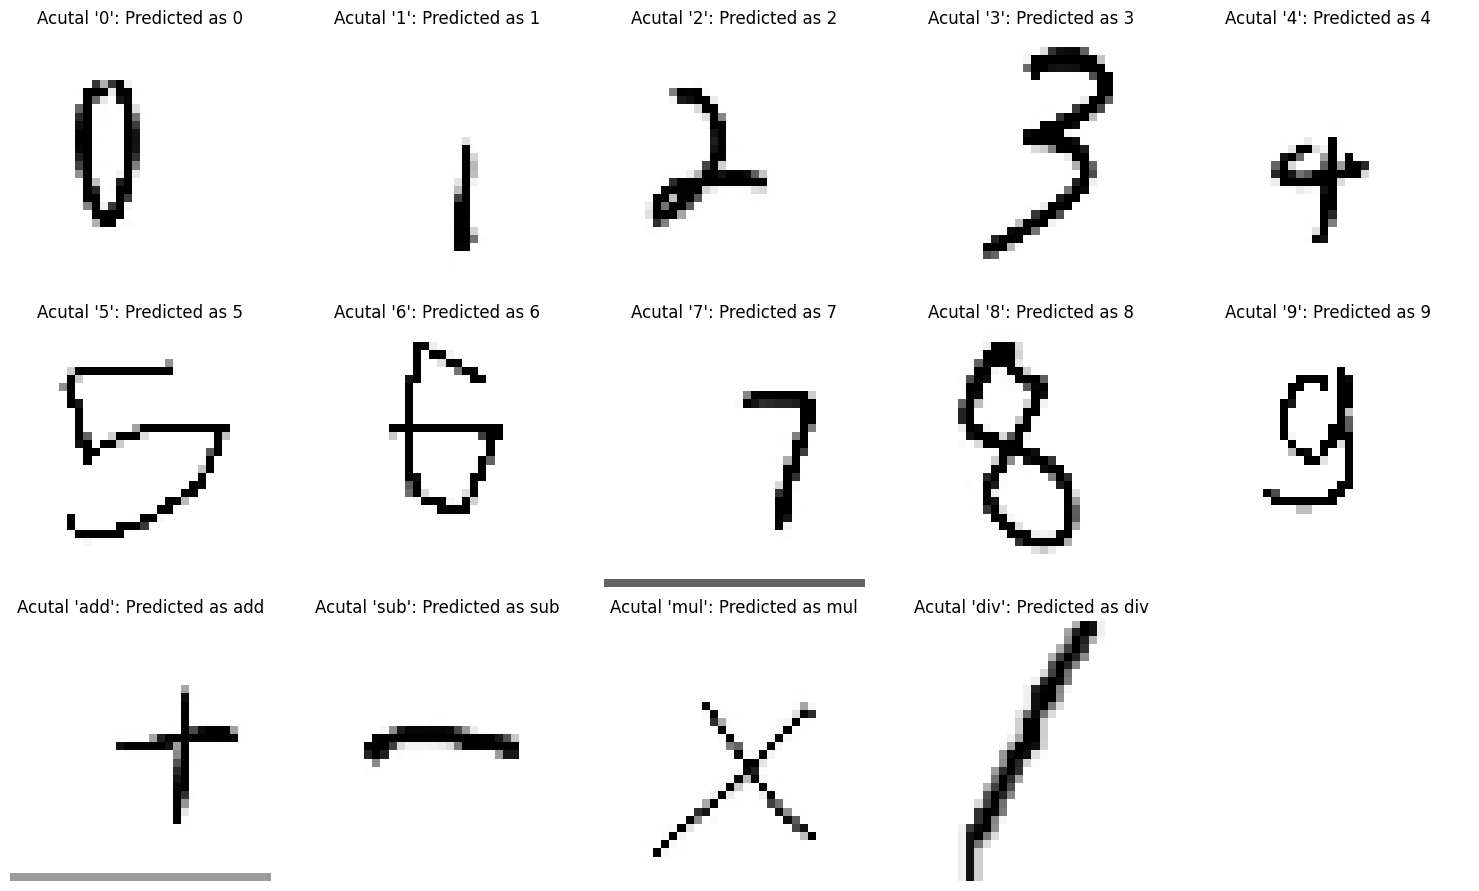

In [98]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = './content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '/', 12: '*', 13: '-'}

model = load_model('cnn_model.h5')

def predict(image_path):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not load image at '{image_path}'. Check the file path.")
        return

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right
    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    # Extract ROI (Regions of Interest)
    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    # Preprocess the images for prediction
    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    # Make predictions
    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    # Draw bounding boxes and labels on the image
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display image with predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Construct the predicted equation
    raw_equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f"Extracted Equation (Raw): {raw_equation}")

    # ✅ Clean up the equation
    equation = re.sub(r'[^0-9+\-*/().]', '', raw_equation)  # Remove unwanted characters
    equation = re.sub(r'(\D)\1+', r'\1', equation)  # Fix consecutive operators (e.g., `---` → `-`)

    print(f"Processed Equation: {equation}")

    # ✅ Safely evaluate the equation
    try:
        result = eval(equation)
        print(f"Result: {result}")
    except Exception as e:
        print(f"Error evaluating equation: {equation}\n{e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


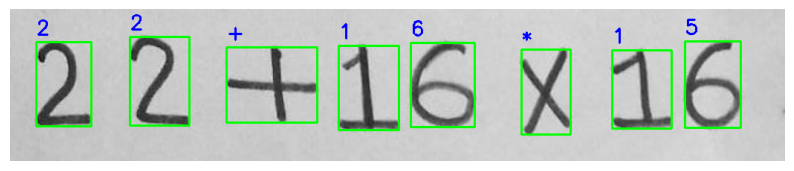

Extracted Equation (Raw): 22+16*15
Processed Equation: 22+16*15
Result: 262


In [101]:
predict('./content/data/eqn.png')

## RNN model

In [102]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(32, 32), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(14, activation='softmax'))

rnn_model.summary()

/Users/apurbakoirala/anaconda3/envs/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,846 (128.30 KB)

 Trainable params: 32,846 (128.30 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 172s 902ms/step - acc: 0.1174 - loss: 2.5635 - val_acc: 0.2191 - val_loss: 2.3314
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 165s 869ms/step - acc: 0.1970 - loss: 2.3082 - val_acc: 0.1717 - val_loss: 2.4795
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 164s 860ms/step - acc: 0.2724 - loss: 2.1397 - val_acc: 0.3717 - val_loss: 1.7885
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 173s 909ms/step - acc: 0.3973 - loss: 1.7527 - val_acc: 0.4395 - val_loss: 1.5946
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 171s 899ms/step - acc: 0.4364 - loss: 1.6260 - val_acc: 0.4947 - val_loss: 1.4296
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 169s 891ms/step - acc: 0.4838 - loss: 1.5047 - val_acc: 0.5467 - val_loss: 1.2838
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 165s 868ms/step - acc: 0.5280 - loss: 1.3797 - val_acc: 0.5355 - val_loss: 1.3218
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 156s 820ms/step - acc: 0.5279 - loss: 1.3673 - val_acc: 0.5901 - val_loss: 1.1004
Epoch 9/10
190/190 ━━━━━

In [105]:
rnn_model.save('rnn_model.h5')

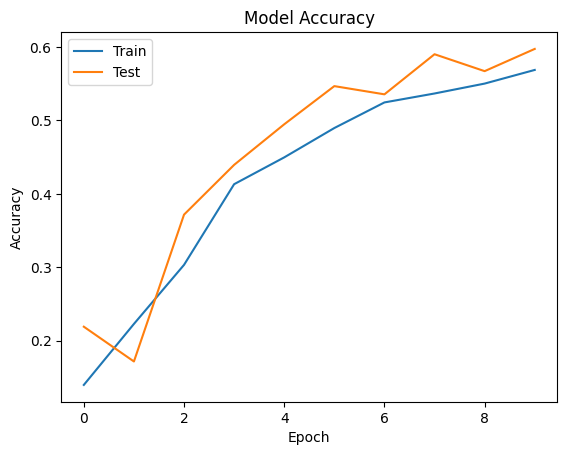

In [106]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step


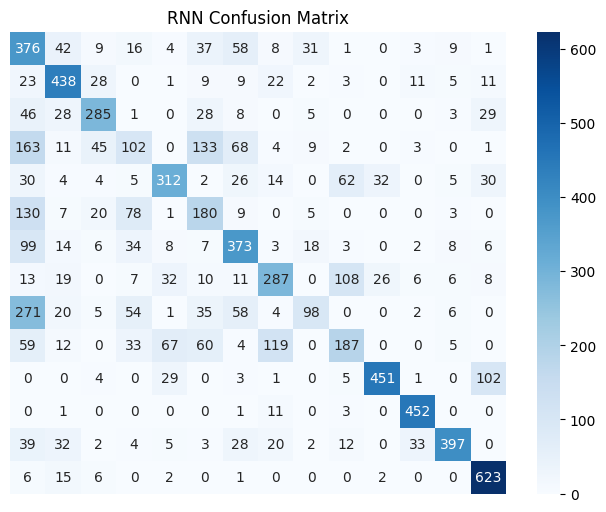

In [107]:
predictions = rnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Confusion Matrix")
plt.axis('off')
plt.show()

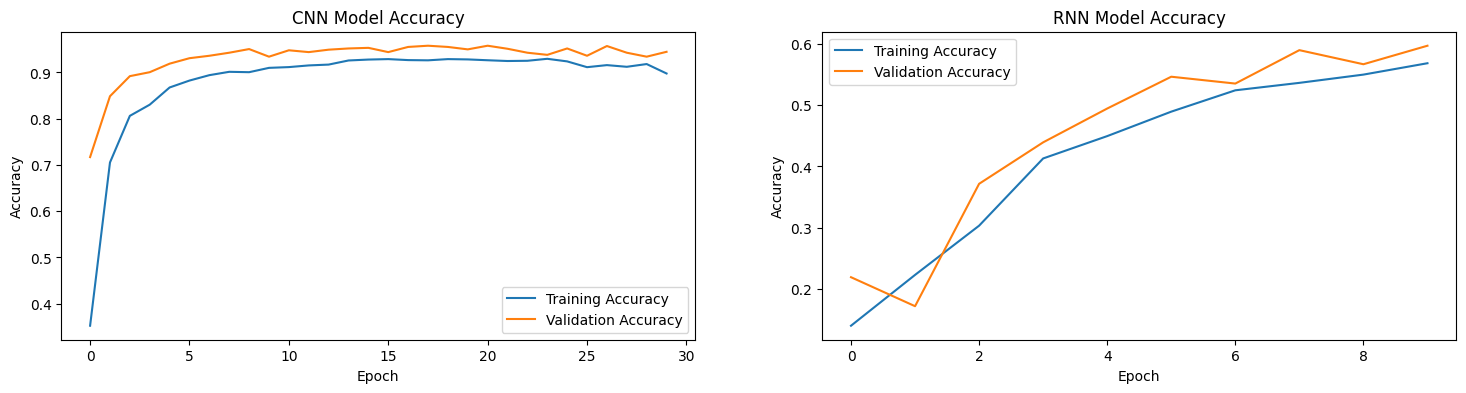

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

axes[0].plot(cnn_history.history['acc'], label='Training Accuracy')
axes[0].plot(cnn_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[1].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('RNN Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()
